<a href="https://colab.research.google.com/github/dharunS05/Python/blob/main/Project_6_Wine_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Wine Prediction



---

if Wine Quality Higher than 7 that good wine or bad wine using wine chemical property

Importing the  Dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

Loading the Dataset


---

Dataset Link -> https://www.youtube.com/redirect?event=video_description&redir_token=QUFFLUhqazJ2eDhMWkoxNENFWGlvTGVXUERRRzJQNHMwUXxBQ3Jtc0tseTVfZVVxREJuOUVaUlB1TGs3TUZqQkNsa3VvQWdYQTdlUEZlUndNZk1RMTlBWm5hRTdIQnFZTk9GR1dCRmVMSGl2YWkyZVAwVTVBZzJLRlFnaFlWUmxZdXo5RGIwMUZ3ZXFFMzhLc3RQRmtaTzlLTQ&q=https%3A%2F%2Fwww.kaggle.com%2Fuciml%2Fred-wine-quality-cortez-et-al-2009&v=CBxJuwrGrc4

In [2]:
#loading wine dataset
wine_dataset = pd.read_csv('/content/winequality-red.csv')

In [4]:
#printing Shape of dataset and first five data
wine_dataset.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
print("Shape of Dataset: ",wine_dataset.shape)

Shape of Dataset:  (1599, 12)


In [6]:
#counting null values in the wine dataset
print(wine_dataset.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


Data Analyse and Visualization

In [7]:
#Wine Data statistics details
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


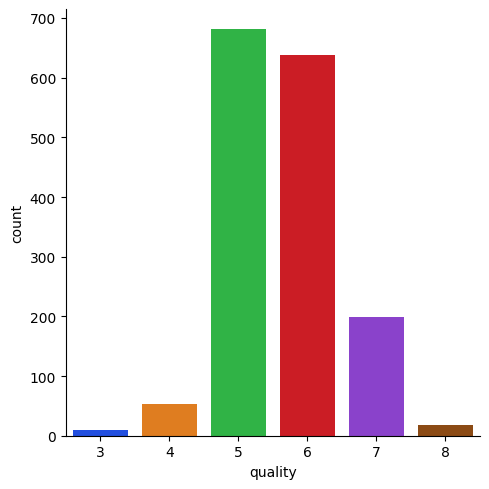

In [14]:
#analyse wine quality values using catplot
sns.catplot(x='quality',data=wine_dataset,kind='count',palette='bright',hue='quality',legend=False)

/tmp/ipython-input-18-1280649216.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='quality',y='volatile acidity',data=wine_dataset,palette='bright')


<Axes: xlabel='quality', ylabel='volatile acidity'>

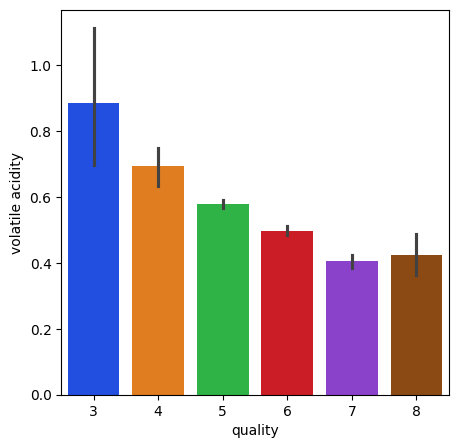

In [18]:
#volatile acidity vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='volatile acidity',data=wine_dataset,palette='bright')

/tmp/ipython-input-20-2525152727.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='quality',y='citric acid',data=wine_dataset,palette='bright')


<Axes: xlabel='quality', ylabel='citric acid'>

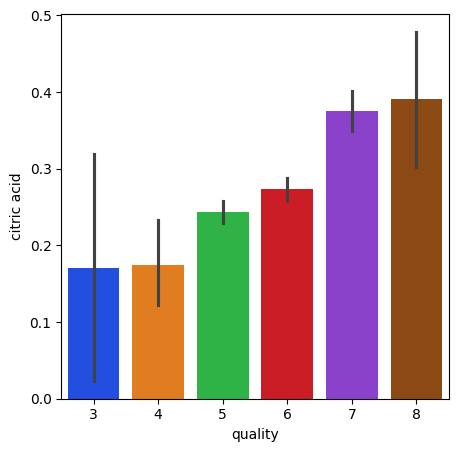

In [20]:
#citric acid vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='citric acid',data=wine_dataset,palette='bright')

/tmp/ipython-input-21-1957589634.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='quality',y='alcohol',data=wine_dataset,palette='bright')


<Axes: xlabel='quality', ylabel='alcohol'>

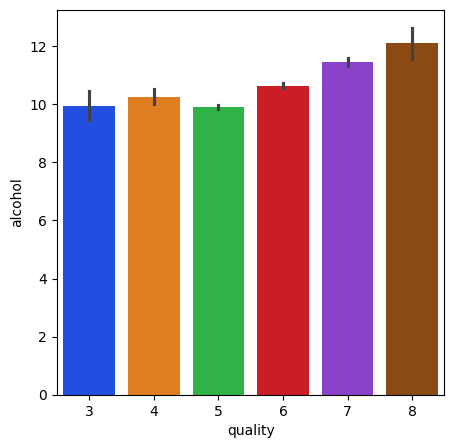

In [21]:
#alcohol vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='alcohol',data=wine_dataset,palette='bright')

correlation

In [22]:
correlation = wine_dataset.corr()

<Axes: >

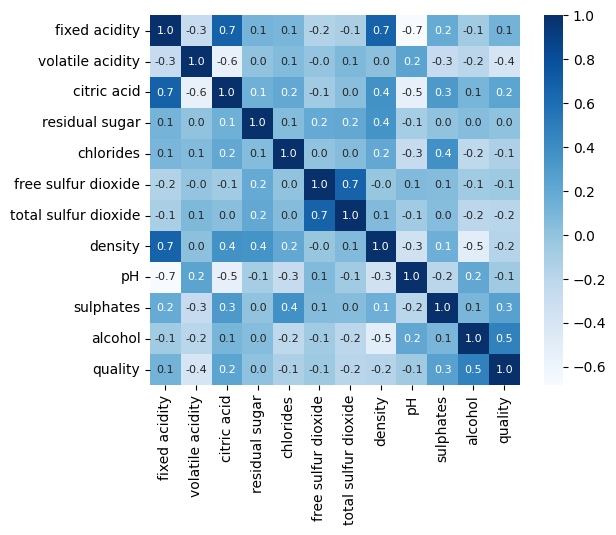

In [24]:
sns.heatmap(correlation,cbar=True,square=True,annot=True,annot_kws={'size':8},cmap='Blues',fmt='.1f')

Seperate features and label

In [25]:
X = wine_dataset.drop(columns='quality',axis=1)

In [26]:
print(X)

      fixed acidity  volatile acidity  citric acid  ...    pH  sulphates  alcohol
0               7.4             0.700         0.00  ...  3.51       0.56      9.4
1               7.8             0.880         0.00  ...  3.20       0.68      9.8
2               7.8             0.760         0.04  ...  3.26       0.65      9.8
3              11.2             0.280         0.56  ...  3.16       0.58      9.8
4               7.4             0.700         0.00  ...  3.51       0.56      9.4
...             ...               ...          ...  ...   ...        ...      ...
1594            6.2             0.600         0.08  ...  3.45       0.58     10.5
1595            5.9             0.550         0.10  ...  3.52       0.76     11.2
1596            6.3             0.510         0.13  ...  3.42       0.75     11.0
1597            5.9             0.645         0.12  ...  3.57       0.71     10.2
1598            6.0             0.310         0.47  ...  3.39       0.66     11.0

[1599 rows x 11

In [28]:
#Label binarization
Y = wine_dataset['quality'].apply(lambda y_val: 1 if y_val >=7 else 0)

In [29]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


In [31]:
Y.value_counts()

,count
quality,
0,1382
1,217


Spliting training and Testing Data

In [33]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)
print(X.shape,X_train.shape,X_test.shape)

(1599, 11) (1279, 11) (320, 11)


Model --- Random Forest Classification

In [34]:
classifier = RandomForestClassifier(n_estimators=100)

In [35]:
#fit the Model
classifier.fit(X_train,Y_train)

RandomForestClassifier()

Evaluate Model


In [36]:
#training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)
print("Training Data Accuracy: ",training_data_accuracy)


Training Data Accuracy:  1.0


In [37]:
#test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)
print("Test Data Accuracy: ",test_data_accuracy)

Test Data Accuracy:  0.9375


New Data Prediction

In [39]:
input_data = (12.8,0.3,0.74,2.6,0.095,9.0,28.0,0.9994,3.2,0.77,10.8)
#convert to list
input_data_as_numpy_array = np.asarray(input_data)

#reshape the list
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

predict = classifier.predict(input_data_reshaped)
print(predict)

if predict == 1:
  print("Good Wine")
else:
  print("Bad Wine")


[1]
Good Wine


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
